In [6]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn
from sklearn.svm import SVC 

In [7]:
# Load data
npz = np.load("../Data/Kepler_data_train.npz",allow_pickle=True)

x_train = npz['inputs']
y_train = npz['targets']

npz = np.load("../Data/Kepler_data_test.npz",allow_pickle=True)
x_test = npz['inputs']
y_test = npz['targets']

In [8]:
# Train and score support vector classifier 
classifier = SVC(C=1, kernel='linear')
classifier.fit(x_train, y_train)
classifier.score(x_test,y_test)

0.8867276887871853

In [9]:
# Predict x-test
y_pred = classifier.predict(x_test)

In [10]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.86      0.68      0.76       438
FALSE POSITIVE       0.74      0.87      0.80       447
     CANDIDATE       0.99      1.00      0.99       863

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.89      1748



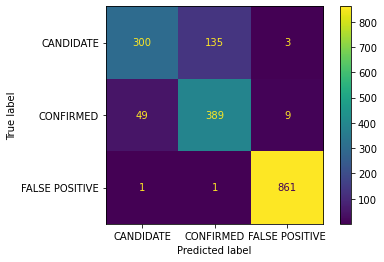

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)